In [3]:
setwd("/Users/rebecca/sudmant/analyses/myotis/analysis/reciprocal_best_hits/contextualize_best_hits")

library(ggplot2)
library(data.table)

myo_meta <- read.csv("../../../data/myotis_meta.csv")

In [7]:
i = 1
j = 1
species_files <- list.files(path = "resources", pattern = paste0("^", myo_meta$Abbr[i], ".*TE_annotations"))
repel_list <- lapply(seq_along(species_files), function(j) {
  species_repel <- fread(file.path("resources", species_files[j]), data.table = FALSE)
  return(species_repel$V7)
})
other_species <- sapply(strsplit(gsub(myo_meta$Abbr[i], "", species_files), "_"), "[", 4)
names(repel_list) <- other_species

In [30]:
repel_class_list <- lapply(seq_along(repel_list), function(i) {
  x <- repel_list[[i]]
  x[grep("^DNA", x)] <- "DNA"
  x[grep("^LINE", x)] <- "LINE"
  x[grep("^LTR", x)] <- "LTR"
  x[grep("^SINE", x)] <- "SINE"
  x[grep("^Simple", x)] <- "Simple repeat"
  x[grep("^Unknown", x)] <- "Unknown"
  x[grep("^snRNA", x)] <- "snRNA"
  x[grep("^rRNA", x)] <- "rRNA"
  x[grep("^tRNA", x)] <- "tRNA"
  class_mat <- as.matrix(table(x))
  return(data.frame(
    Species = names(repel_list)[i], 
    Type = rownames(class_mat),
    No.Elems = class_mat,
    row.names = NULL
    ))
})
repel_class_df <- do.call(rbind, repel_class_list)

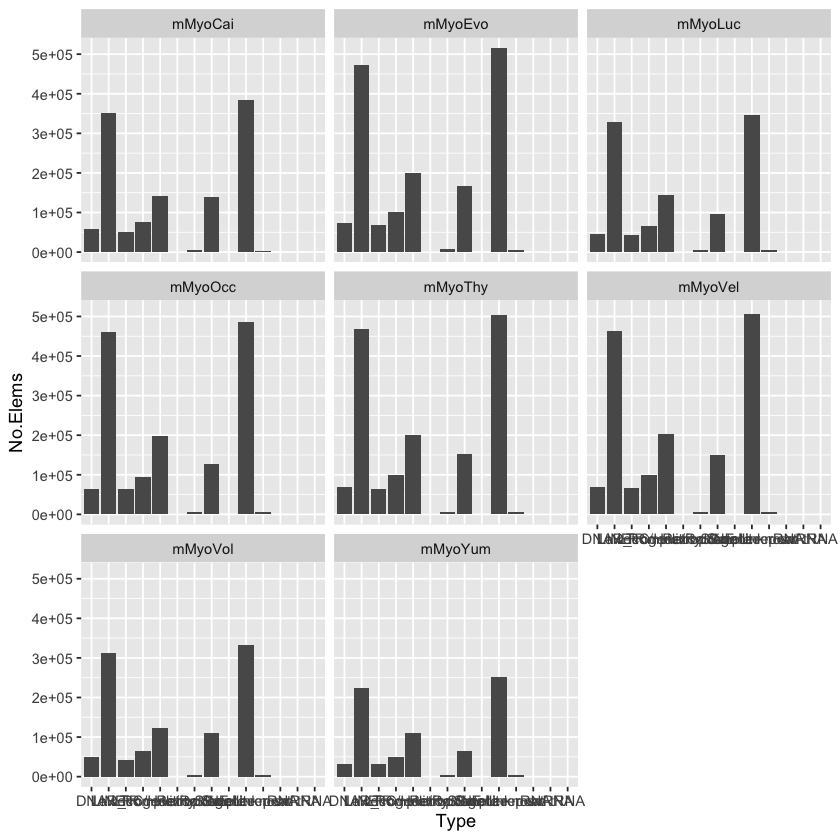

In [34]:
ggplot(repel_class_df, aes(x = Type, y = No.Elems)) +
  geom_bar(stat = "identity") +
  facet_wrap(. ~ Species)